1.	Problem Statement: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

## Importing libraries and datasets:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [2]:
comp = pd.read_csv('Company_Data.csv')
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Checking for the datatypes:

In [3]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


### Checking for null values:

In [4]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### Using descriptive statistics:

In [5]:
comp.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Data Visualization:

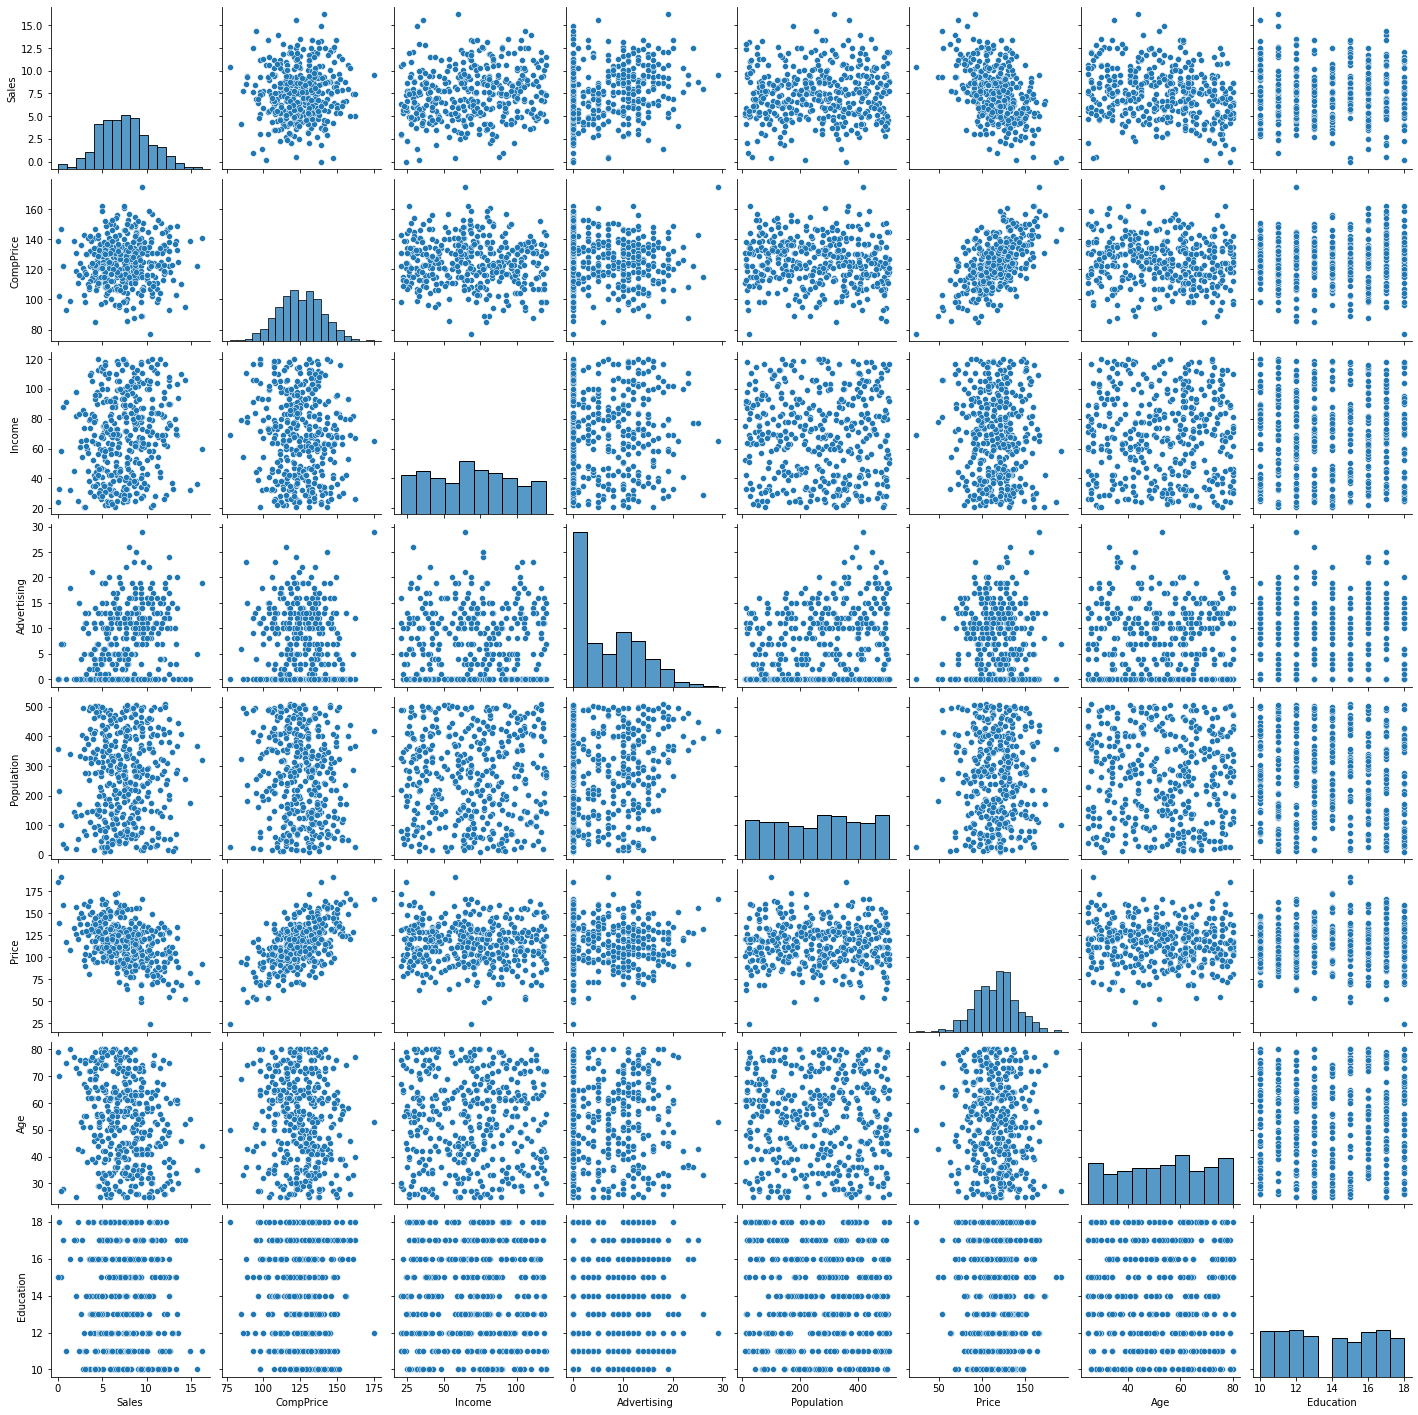

In [6]:
sns.pairplot(comp)

### Plotting all the numerical data using swarmplot:

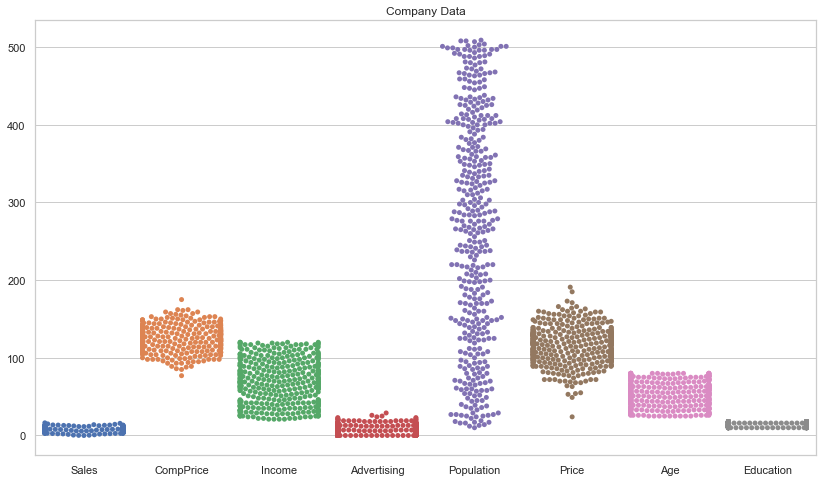

In [7]:
plt.figure(figsize=[14,8])
sns.set(style='whitegrid')
ax = sns.swarmplot(data=comp)
plt.title('Company Data')
plt.show()

### Correlation Analysis:

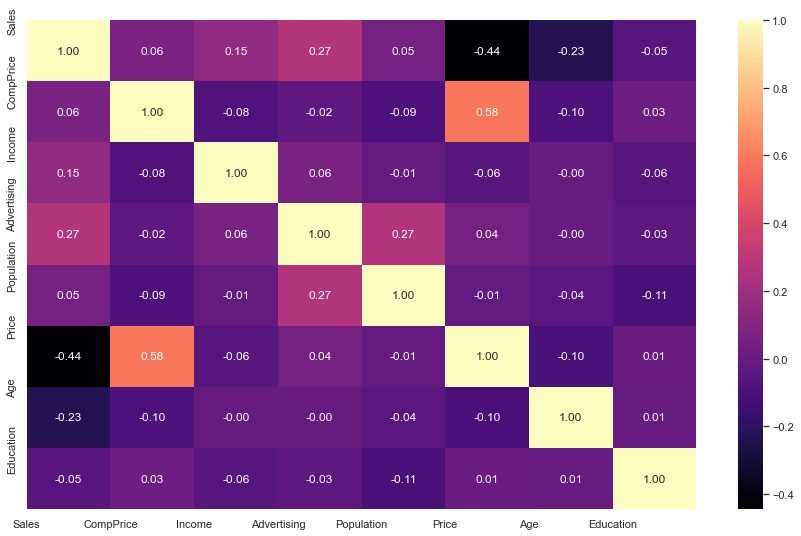

In [8]:
corr = comp.corr()
fig, ax = plt.subplots(figsize = (15,9))
sns.heatmap(corr, cmap='magma', annot=True, fmt='.2f')
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

### Plotting all the categorical data using countplot:

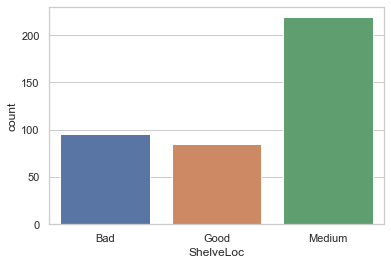

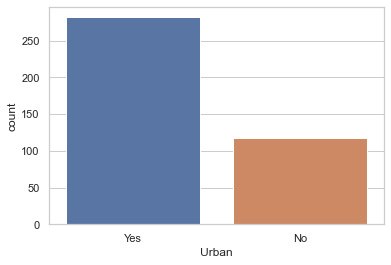

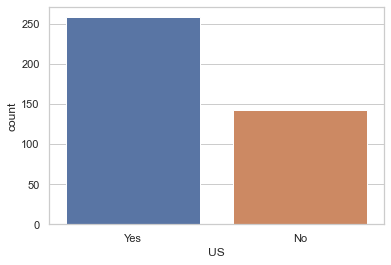

In [9]:
sns.countplot(comp['ShelveLoc'])
plt.show()

sns.countplot(comp['Urban'])
plt.show()

sns.countplot(comp['US'])
plt.show()

### Using Category Encoder to convert all the categorical values into numerical:

In [10]:
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
comp1 = encoder.fit_transform(comp)
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,1,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,3,59,12,1,1
3,7.40,117,100,4,466,97,3,55,14,1,1
4,4.15,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,3,55,11,2,1
397,7.41,162,26,12,368,159,3,40,18,1,1
398,5.94,100,79,7,284,95,1,50,12,1,1


### Calculating the mean of sales column :

In [11]:
m = np.mean(comp['Sales'])
m

7.496325

In [12]:
sales = []
for value in comp['Sales']:
    if value <= m:
        sales.append('low')
    else:
        sales.append('high')
        
comp1['sales'] = sales

In [13]:
comp1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,high
396,6.14,139,23,3,37,120,3,55,11,2,1,low
397,7.41,162,26,12,368,159,3,40,18,1,1,low
398,5.94,100,79,7,284,95,1,50,12,1,1,low


### Model Building:

In [14]:
x = comp1.drop(['Sales', 'sales'], axis=1)
y = comp1[['sales']]

In [15]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [16]:
y

,sales
0,high
1,high
2,high
3,low
4,low
...,...
395,high
396,low
397,low
398,low


## Random Forest:

In [17]:
num_tree = 200
max_feat = 4
kfold = KFold(n_splits=15)
model = RandomForestClassifier(n_estimators=num_tree, max_features=max_feat)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8125356125356126


## Ensemble Techniques:

### 1. Bagging:

In [18]:
seed = 7
num_tree = 200
kfold = KFold(n_splits=15, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.817473884140551


### 2. Boosting(AdaBoostClassifier Classification):

In [19]:
num_tree = 200
seed = 7
kfold = KFold(n_splits=15, random_state=seed, shuffle=True)
model = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.8627730294396961


### 3. Stacking:

### Iteration = 1

In [20]:
estimators = []
model1  =LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

#Creating ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7724596391263058


### Iteration = 2

In [21]:
estimators = []
model4  =LogisticRegression(max_iter=500)
estimators.append(('logistic', model4))

model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))

model6 = SVC()
estimators.append(('svm', model6))

model7 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
estimators.append(('bagging', model7))

model8 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model8))

#Creating ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8300094966761635


### Iteration = 3

In [22]:
estimators = []
model9  =LogisticRegression(max_iter=500)
estimators.append(('logistic', model9))

model10 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model10))

#Creating ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8451092117758786


### Iteration = 4

In [23]:
estimators = []
model11  =LogisticRegression(max_iter=500)
estimators.append(('logistic', model11))

model12 = DecisionTreeClassifier()
estimators.append(('cart', model12))

model13 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model13))

model14 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
estimators.append(('bagging', model14))

#Creating ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8625830959164295


### Iteration = 5

In [24]:
estimators = []
model9  =LogisticRegression(max_iter=500)
estimators.append(('logistic', model9))

model10 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model10))

model14 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
estimators.append(('bagging', model14))

model12 = DecisionTreeClassifier()
estimators.append(('cart', model12))

#Creating ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.8601139601139601


#### After looking at above techniques we can conclude that boosting technique gives us the highest accuracy.

Use Random Forest to prepare a model on fraud data 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

## Importing libraries and datasets:

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
fraud = pd.read_csv('C:\\Users\\aditi\\Downloads\\Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA:
### Checking for the datatypes:

In [27]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [28]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


### Checking for duplicate values:

In [29]:
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


## Data Visualization:

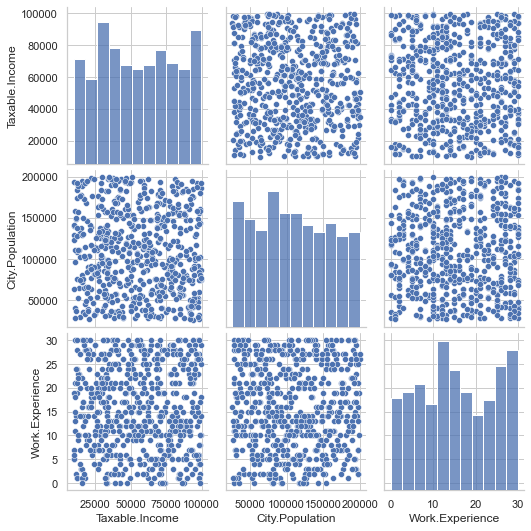

In [30]:
sns.pairplot(fraud)

### Plotting all the numerical data in the dataset:

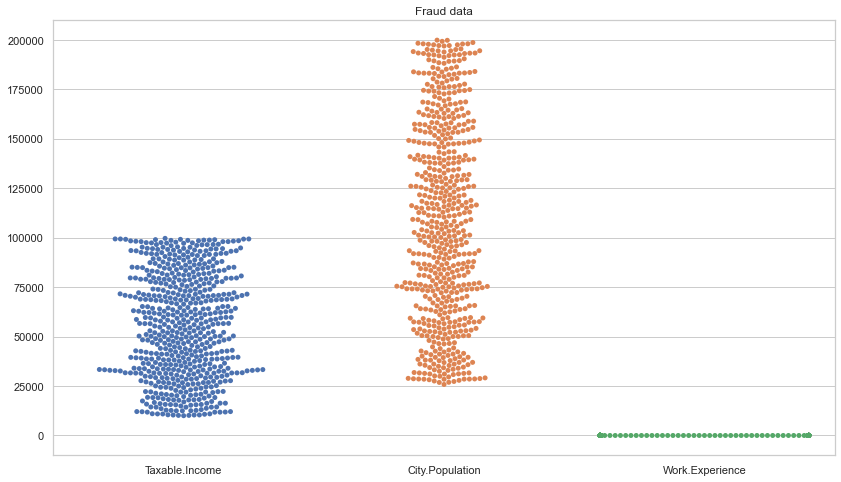

In [31]:
plt.figure(figsize=[14,8])
sns.set(style='whitegrid')
ax = sns.swarmplot(data=fraud)
plt.title('Fraud data')
plt.show()

### Correlation analysis:

<AxesSubplot:>

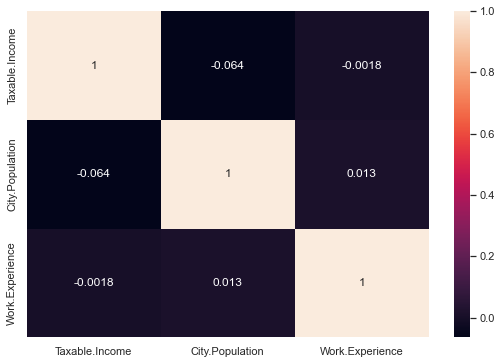

In [32]:
plt.figure(figsize=[9,6])
sns.heatmap(fraud.corr(), annot=True)

### Plotting all the categorical data:

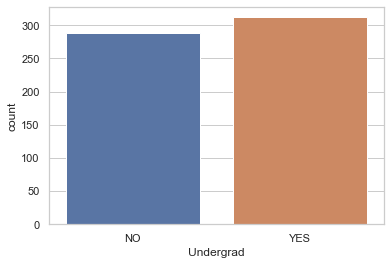

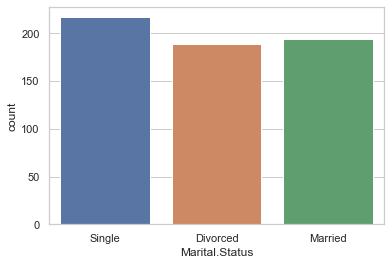

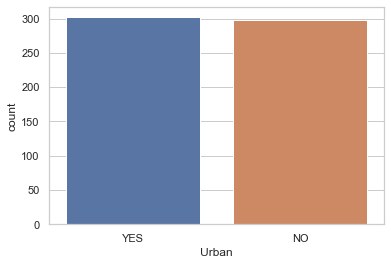

In [33]:
sns.countplot(fraud['Undergrad'])
plt.show()

sns.countplot(fraud['Marital.Status'])
plt.show()

sns.countplot(fraud['Urban'])
plt.show()

### Using Category Encoder to convert all the categorical values into numerical:

In [34]:
encoder = ce.OrdinalEncoder(cols=['Undergrad', 'Marital.Status', 'Urban'])
fraud1 = encoder.fit_transform(fraud)
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,1,1,68833,50047,10,1
1,2,2,33700,134075,18,1
2,1,3,36925,160205,30,1
3,2,1,50190,193264,15,1
4,1,3,81002,27533,28,2
...,...,...,...,...,...,...
595,2,2,76340,39492,7,1
596,2,2,69967,55369,2,1
597,1,2,47334,154058,0,1
598,2,3,98592,180083,17,2


### Setting the value of Taxable.Income to Risky or Good:

In [35]:
tax = []
for val in fraud['Taxable.Income']:
    if val <=30000:
        tax.append('Risky')
    else:
        tax.append('Good')

fraud1['tax'] = tax
fraud1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax
0,1,1,68833,50047,10,1,Good
1,2,2,33700,134075,18,1,Good
2,1,3,36925,160205,30,1,Good
3,2,1,50190,193264,15,1,Good
4,1,3,81002,27533,28,2,Good
...,...,...,...,...,...,...,...
595,2,2,76340,39492,7,1,Good
596,2,2,69967,55369,2,1,Good
597,1,2,47334,154058,0,1,Good
598,2,3,98592,180083,17,2,Good


### Model Building:

In [36]:
x = fraud1.drop(['tax', 'Taxable.Income'], axis=1)
y = fraud1[['tax']]

In [37]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [38]:
y

,tax
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [39]:
y.value_counts()

tax  
Good     476
Risky    124
dtype: int64

## Random Forest Classification:

In [40]:
num_tree = 100
max_feat = 4
kfold = KFold(n_splits=20)
model = RandomForestClassifier(n_estimators=num_tree, max_features=max_feat)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7333333333333334


## Ensemble Techniques:

### Bagging:

In [41]:
seed = 7
num_tree = 100
cart = DecisionTreeClassifier()
kfold = KFold(n_splits=20)
model = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7350000000000001


### Boosting (AdaBoost Classification):

In [42]:
seed = 7
num_tree = 100
cart = DecisionTreeClassifier()
kfold = KFold(n_splits=20)
model2 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
results2 = cross_val_score(model2, x, y, cv=kfold)
print(results2.mean())

0.7733333333333335


### Stacking:
### Iteration 1

In [43]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model7 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model7))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333334


### Iteration 2

In [44]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = SVC()
estimators.append(('svm', model3))

model6 = BaggingClassifier(base_estimator=cart, n_estimators=num_tree, random_state=seed)
estimators.append(('bagging', model6))

model7 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model7))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7833333333333334


### Iteration 3

In [45]:
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))

model7 = AdaBoostClassifier(n_estimators=num_tree, random_state=seed)
estimators.append(('boosting', model7))

ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x, y, cv=kfold)
print(results.mean())

0.7933333333333334


#### After looking at above techniques we can conclude that stacking technique gives us the highest accuracy.

### Converting the Taxable.Income from categorical to numerical:

In [46]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,1,1,50047,10,1
1,2,2,134075,18,1
2,1,3,160205,30,1
3,2,1,193264,15,1
4,1,3,27533,28,2
...,...,...,...,...,...
595,2,2,39492,7,1
596,2,2,55369,2,1
597,1,2,154058,0,1
598,2,3,180083,17,2


In [47]:
y

,tax
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


### Using LabelEncoder to transform tax into numerical variable: 

In [48]:
le = LabelEncoder()
y['tax'] = le.fit_transform(y['tax'])
y

,tax
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


### Normalizing the data:

In [49]:
def minmax(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

x_norm = minmax(x.iloc[:,0:])
x_norm.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0.0,0.0,0.139472,0.333333,0.0
1,1.0,0.5,0.622394,0.600000,0.0
2,0.0,1.0,0.772568,1.000000,0.0
3,1.0,0.0,0.962563,0.500000,0.0
4,0.0,1.0,0.010081,0.933333,1.0


### Model Building:

In [50]:
x_train, x_test, y_train, y_test = train_test_split(
    x_norm, y, test_size=0.2, random_state=12, stratify=y)

In [51]:
x_train.shape, y_train.shape

((480, 5), (480, 1))

In [52]:
x_test.shape, y_test.shape

((120, 5), (120, 1))

### Random Forest Classifier:

In [53]:
rfm = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=9, random_state=0)
rfm.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, random_state=0)

In [54]:
y_train_pred = rfm.predict(x_train)

In [55]:
accuracy_score(y_train, y_train_pred)

0.9270833333333334

### Classification Report(training set):

In [56]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       381
           1       1.00      0.65      0.79        99

    accuracy                           0.93       480
   macro avg       0.96      0.82      0.87       480
weighted avg       0.93      0.93      0.92       480



### Confusion Matrix (training set):

In [57]:
confusion_matrix(y_train, y_train_pred)

array([[381,   0],
       [ 35,  64]], dtype=int64)

In [58]:
y_test_pred = rfm.predict(x_test)

In [59]:
accuracy_score(y_test, y_test_pred)

0.7666666666666667

### Classification report and confusion matrix(test set)

In [60]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        95
           1       0.00      0.00      0.00        25

    accuracy                           0.77       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.62      0.77      0.69       120



In [61]:
confusion_matrix(y_test, y_test_pred)

array([[92,  3],
       [25,  0]], dtype=int64)